## Looking at how fast the sudoku solver works


In [61]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np

df = pd.read_csv('sudoku_tst_scores.csv')
df.head()

,date,sudoku,time,difficulty,alg2,version
0,2022-07-30 00:33:22.214405,"""003020600900305001001806400008102900700000008...",0.00232,1,False,v2.11
1,2022-07-30 00:33:22.217619,"""003020600900305001001806400008102900700000008...",0.00216,1,True,v2.11
2,2022-07-30 00:33:22.219949,"""005306078200407005000009106008002034040030010...",0.00167,1,False,v2.11
3,2022-07-30 00:33:22.222150,"""005306078200407005000009106008002034040030010...",0.00155,1,True,v2.11
4,2022-07-30 00:33:22.233287,"""069800500000000103400000020000170000080006000...",0.01052,7,False,v2.11


In [62]:
df_tw = (df
         .assign(sudoku=lambda df_: df_.sudoku.apply(lambda x: x[1:7]),
                 time=df.time * 1000,
                 date=pd.to_datetime(df.date)
            )
        )
df_tw[df_tw.difficulty > 10].head(20)

,date,sudoku,time,difficulty,alg2,version
7,2022-07-30 00:33:24.831531,800000,2589.64,1824,False,v2.11
8,2022-07-30 00:33:25.034030,005300,153.89,141,False,v2.11
9,2022-07-30 00:33:42.116987,000000,17049.94,13999,False,v2.11
18,2022-07-30 00:53:32.375880,800000,1076.46,801,False,v2.11
19,2022-07-30 00:53:32.561655,800000,182.62,102,True,v2.11
20,2022-07-30 00:53:32.789140,005300,226.15,128,False,v2.11
21,2022-07-30 00:53:32.861370,005300,71.29,42,True,v2.11
22,2022-07-30 00:53:40.904255,000000,8041.36,7563,False,v2.11
32,2022-07-30 11:57:59.624401,800000,2397.78,1841,False,v2.11
33,2022-07-30 11:57:59.986054,800000,360.80,193,True,v2.11


In [74]:
df_pl = (df_tw
         .groupby(by=['sudoku', 'alg2', 'version'])
         .median()
         .reset_index()
         .query('alg2 == True')
        )
df_pl.shape


(21, 5)

<AxesSubplot:xlabel='sudoku', ylabel='difficulty'>

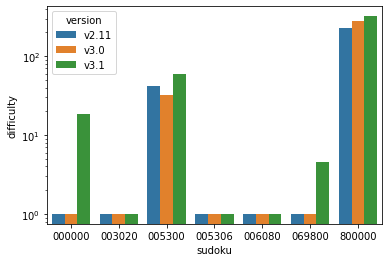

In [75]:
sns.barplot(data=df_pl, x='sudoku', y='difficulty', hue='version', log=True)

In [69]:

df_pl2 = df_tw['version'].value_counts()
df_pl2

v2.11    181
v3.0     158
v3.1      84
Name: version, dtype: int64

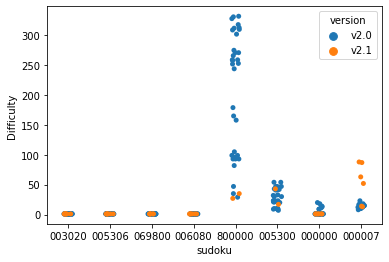

In [7]:
#g = sns.stripplot(data=df_tw[df_tw['Alg2?']==False], x='sudoku', y='Difficulty', hue='Alg2?')
df_tw = df_tw.rename(columns={'Alg2?': 'alg2'})
g = sns.stripplot(data=df_tw.query('alg2==True'), x='sudoku', y='Difficulty', hue='version')